### Importing Libraries for EDA

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [5]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [6]:
df_customers.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001


In [7]:
df_loans.head(3)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [8]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [9]:
df_temp = df_customers.merge(df_bureau, on='cust_id', how='left')
df = df_temp.merge(df_loans, on='cust_id', how='left')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  number_of_open_accounts      50000 non-null  int64  
 13  number_of_closed

### Check for class imbalance

In [10]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
df.default.unique()

array([0, 1])

### Train Test split to avoid data leakage

In [12]:
from sklearn.model_selection import train_test_split 

X = df.drop("default", axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,23442000,468840.0,4219560,18753600,28,5000000,4820526,2020-10-31,2020-11-11,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,1149000,22980.0,206820,919200,50,467229,216697,2022-10-22,2022-10-27,0


## Data preprocessing and EDA

### Handle Missing & Duplicate Values

In [13]:
df_train.shape

(37500, 33)

In [14]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_a

In [15]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [17]:
df_train['residence_type'] = df_train.residence_type.fillna(mode_residence)
df_test['residence_type'] = df_test.residence_type.fillna(mode_residence)

df_train.residence_type.unique(), df_test.residence_type.unique()

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [18]:
df_train.duplicated().sum()

np.int64(0)

In [19]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,...,credit_utilization_ratio,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,default
count,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,...,37500.000000,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,37500.000000,3.750000e+04,3.750000e+04,37500.000000
mean,39.540587,2.633326e+06,1.944533,15.997787,418866.253333,2.502907,1.001120,76.11104,4.844853,26.672613,...,43.424880,4.699692e+06,3.996068e+06,8.029068e+04,7.192922e+05,3.196854e+06,25.961040,1.333820e+06,9.862989e+05,0.085947
std,9.858344,2.623781e+06,1.535943,8.921041,169035.021773,1.119070,0.814021,43.76852,5.841396,32.779424,...,29.392857,6.257833e+06,5.371862e+06,1.131281e+05,9.669352e+05,4.297490e+06,12.447444,1.213674e+06,1.043145e+06,0.280289
min,18.000000,0.000000e+00,0.000000,1.000000,110001.000000,1.000000,0.000000,1.00000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,-1.000000e+00,0.000000e+00,0.000000
25%,33.000000,8.020000e+05,0.000000,8.000000,302001.000000,1.000000,0.000000,42.00000,0.000000,0.000000,...,18.000000,1.142000e+06,9.610000e+05,1.922000e+04,1.729800e+05,7.688000e+05,16.000000,4.221975e+05,2.870402e+05,0.000000
50%,39.000000,1.885000e+06,2.000000,16.000000,400001.000000,3.000000,1.000000,71.00000,3.000000,13.000000,...,39.000000,2.644000e+06,2.230000e+06,4.460000e+04,4.014000e+05,1.784000e+06,24.000000,9.974275e+05,6.650145e+05,0.000000
75%,46.000000,3.326250e+06,3.000000,24.000000,560001.000000,4.000000,2.000000,107.00000,8.000000,46.000000,...,67.000000,5.178000e+06,4.619000e+06,9.242000e+04,8.314200e+05,3.695200e+06,35.000000,1.784879e+06,1.234063e+06,0.000000
max,70.000000,1.199900e+07,5.000000,31.000000,700001.000000,4.000000,2.000000,223.00000,24.000000,171.000000,...,99.000000,5.217500e+07,4.781900e+07,5.293544e+06,8.607420e+06,3.825520e+07,59.000000,5.000000e+06,7.846643e+06,1.000000


In [20]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default'],
      dtype='object')

In [21]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

### Box plot to visualize outliers

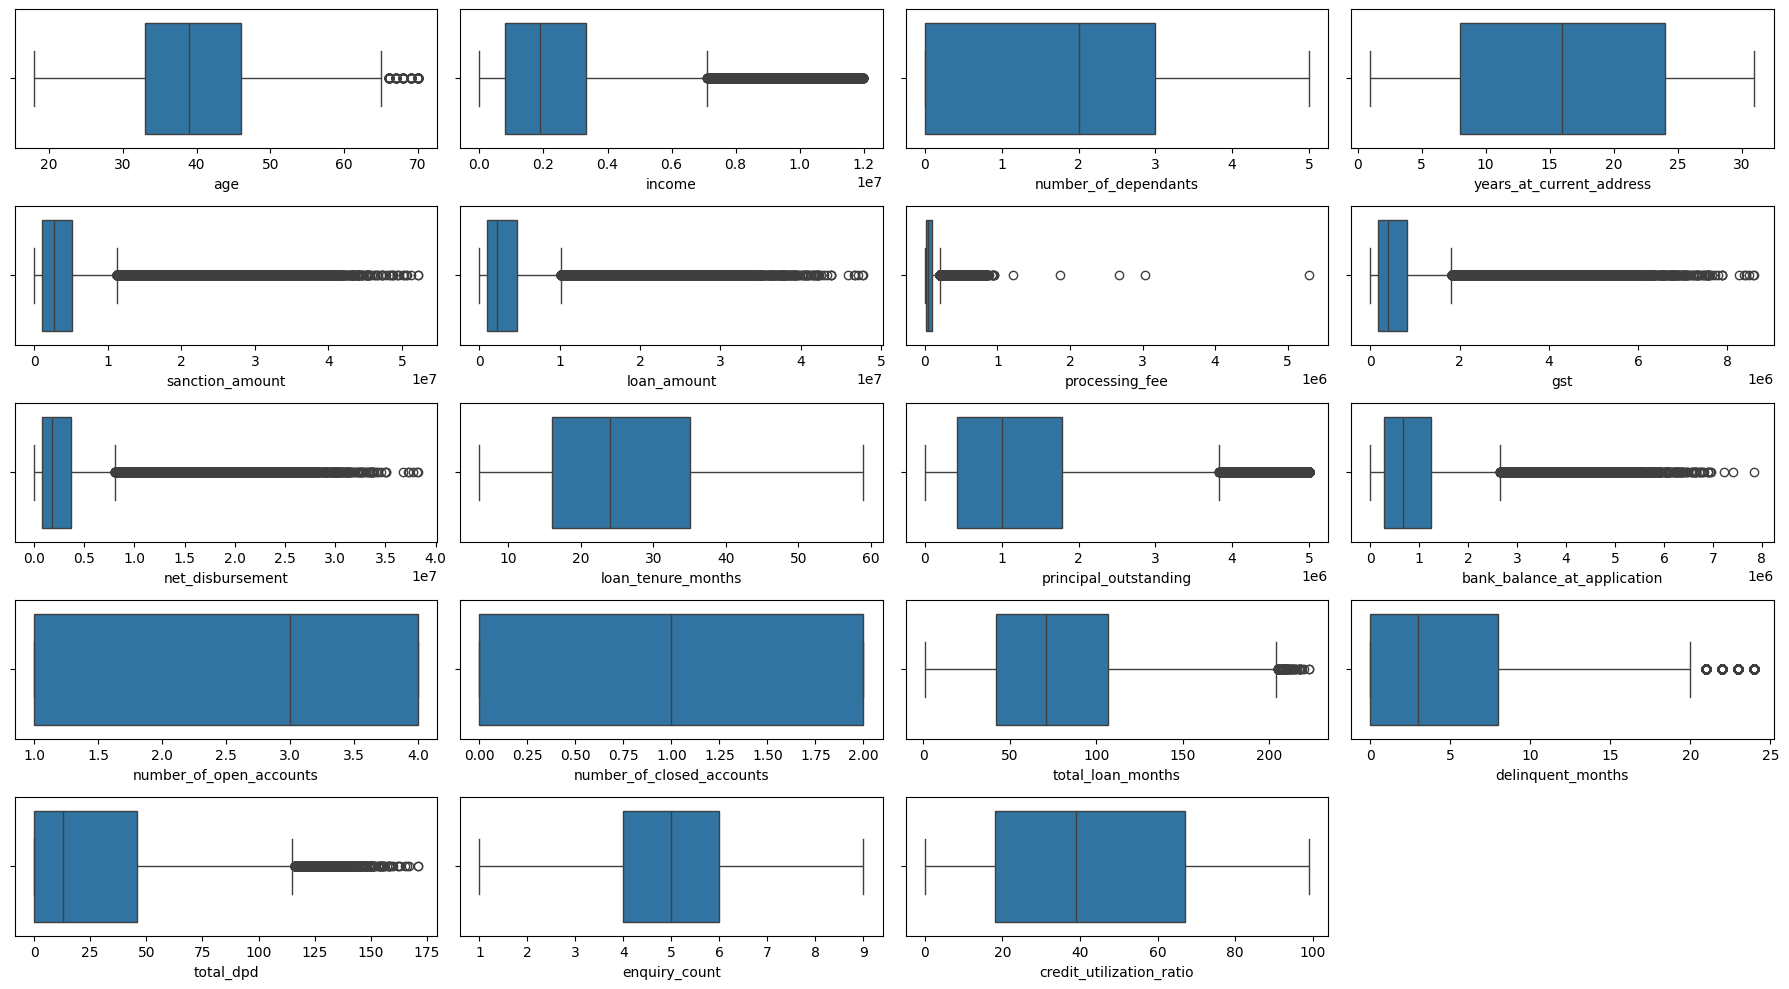

In [22]:
plt.figure(figsize=(18,10))

for i,col in enumerate(columns_continuous,1):
    plt.subplot(5,4,i)
    sns.boxplot(df_train, x=col)

plt.tight_layout()
plt.show()

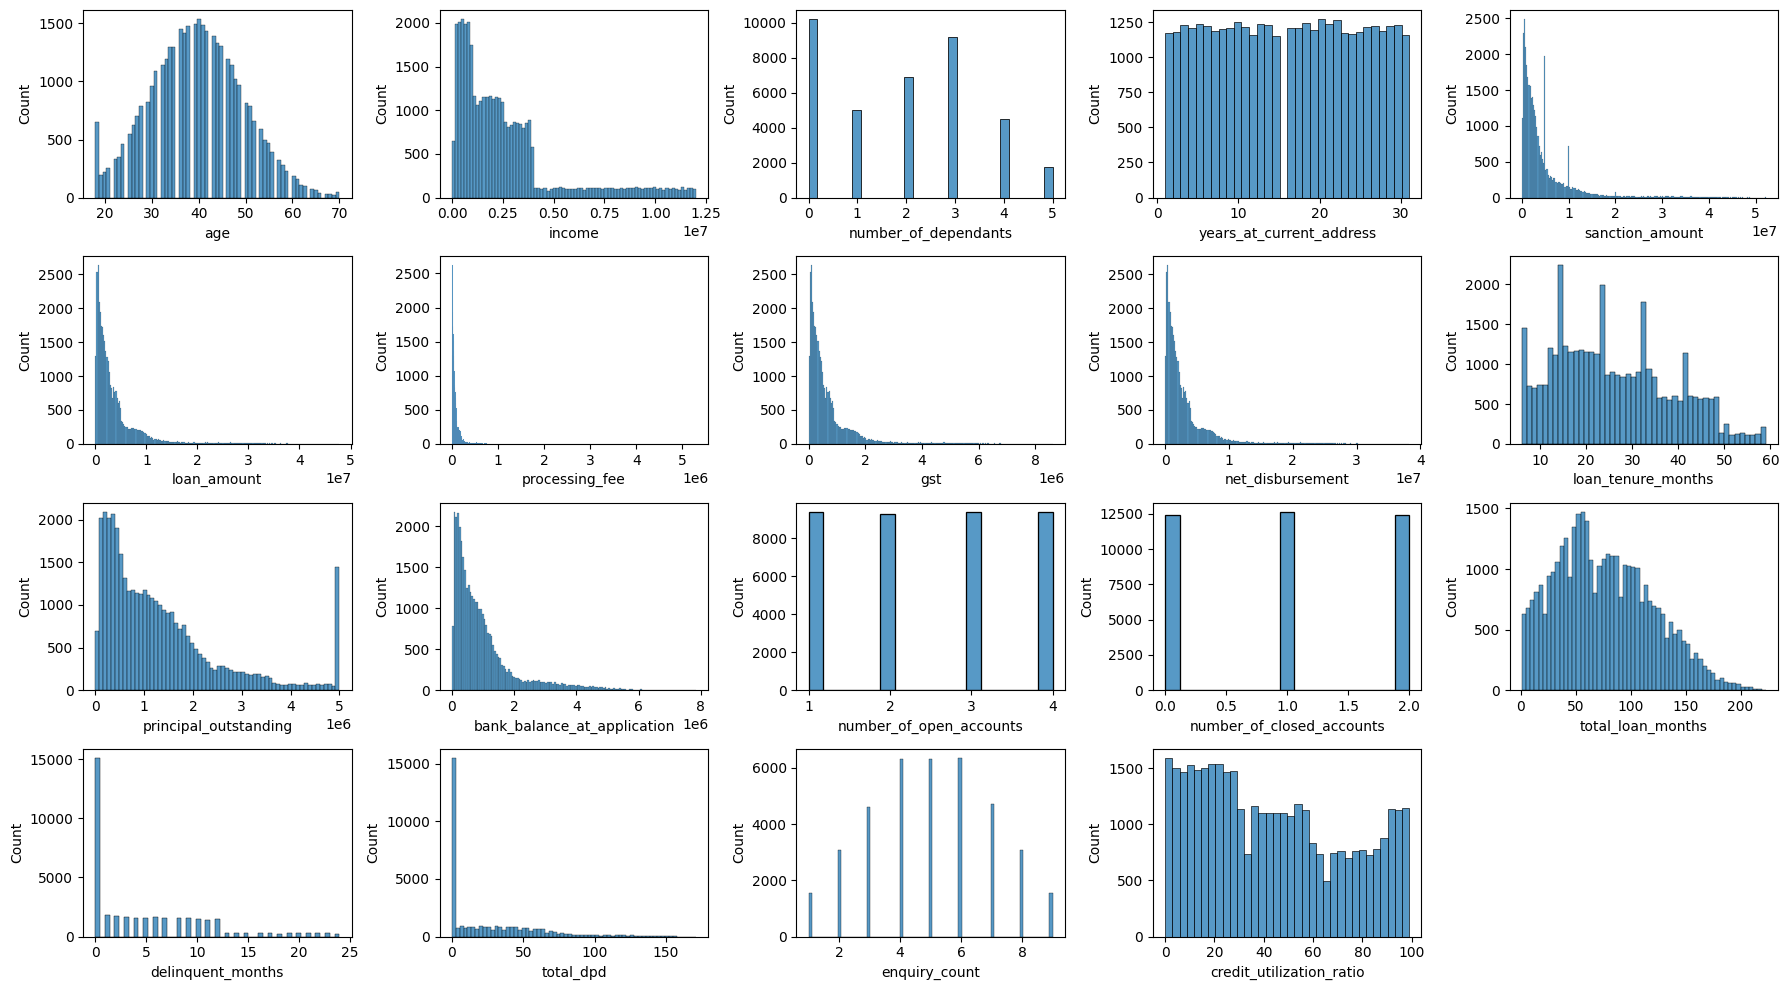

In [23]:
plt.figure(figsize=(18,10))

for i,col in enumerate(columns_continuous,1):
    plt.subplot(4,5,i)
    sns.histplot(df_train, x=col)

plt.tight_layout()
plt.show()

### Outlier Removal: Processing Fee

In [24]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293544e+06
Name: processing_fee, dtype: float64

In [25]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


In [26]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape

(37488, 33)

In [27]:
df_test.residence_type.isna().sum()

np.int64(0)

In [28]:
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 33)

### Analyze Categorical Columns

In [29]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [30]:
for col in columns_categorical:
    print(col, "->", df_train_1[col].unique(),"\n")

gender -> ['M' 'F'] 

marital_status -> ['Married' 'Single'] 

employment_status -> ['Self-Employed' 'Salaried'] 

residence_type -> ['Owned' 'Mortgage' 'Rented'] 

city -> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur'] 

state -> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan'] 

zipcode -> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001] 

loan_purpose -> ['Home' 'Education' 'Personal' 'Auto' 'Personaal'] 

loan_type -> ['Secured' 'Unsecured'] 

default -> [0 1] 



In [31]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [32]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

In [33]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [34]:
df_train_1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.0,39.767693,9.880235,18.0,33.0,40.0,46.0,70.0
1,3223.0,37.124729,9.290168,18.0,31.0,37.0,44.0,70.0


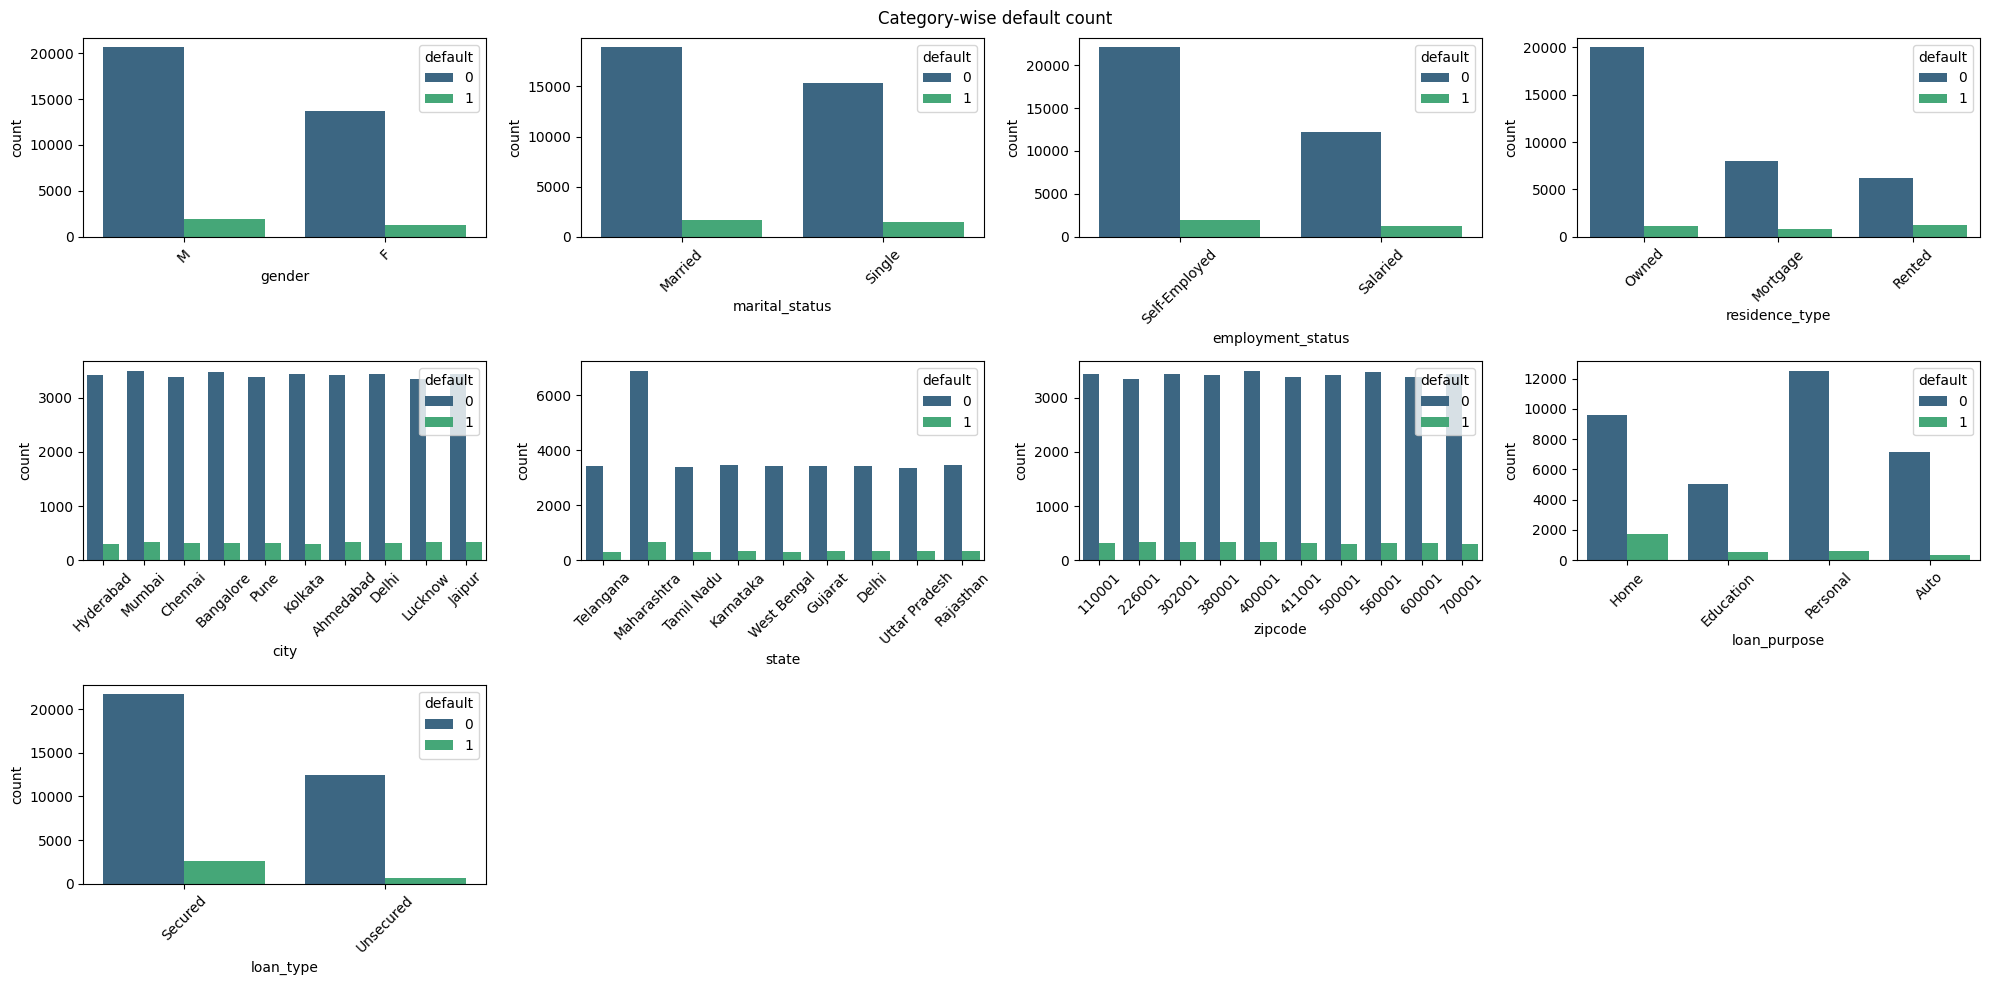

In [35]:
plt.figure(figsize=(20,10))
plt.suptitle("Category-wise default count")
for i,col in enumerate(columns_categorical[0:-1],1):
    plt.subplot(3,4,i)
    sns.countplot(df_train_1, x=col, hue='default', palette="viridis")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

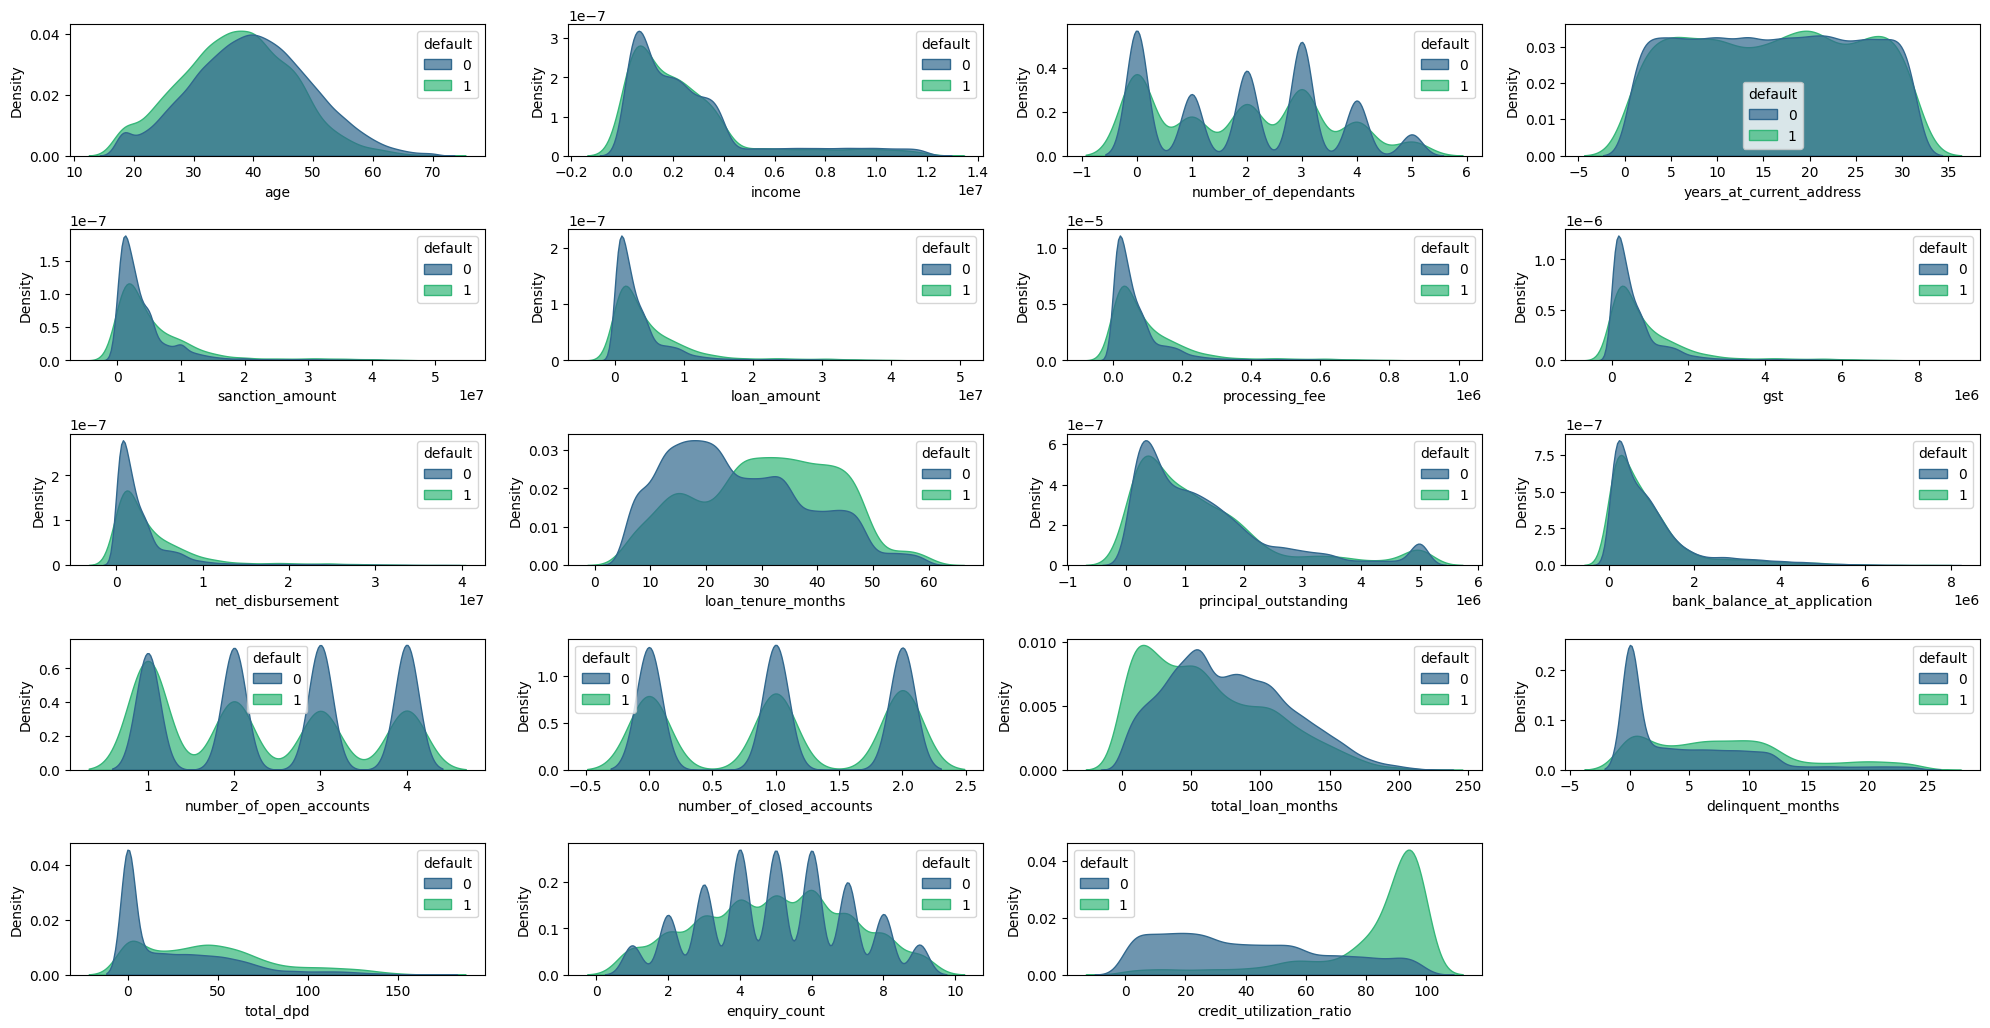

In [36]:
plt.figure(figsize=(20, 12)) 
for i, col in enumerate(columns_continuous,1):
    plt.subplot(6, 4, i) 
    sns.kdeplot(data=df_train_1, x=col, hue='default', fill=True,common_norm=False, palette='viridis', alpha=0.7)
plt.tight_layout()
plt.show()



## Feature Engineering and Feature Selection

#### Generate Loan to Income (LTI) Ratio

In [37]:
df_train_1[["loan_amount", "income"]].head(3)

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000


In [38]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount'] / df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count    37488.000000
mean         1.556711
std          0.973687
min          0.300000
25%          0.770000
50%          1.160000
75%          2.460000
max          4.570000
Name: loan_to_income, dtype: float64

In [39]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

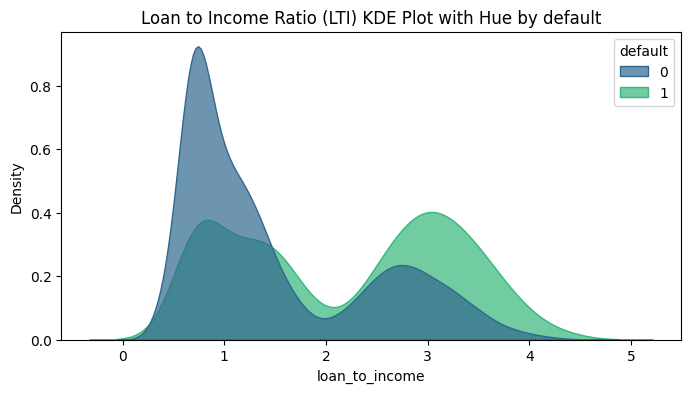

In [40]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1, x='loan_to_income',hue="default", fill=True, common_norm=False, palette="viridis", alpha=0.7)
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.show()

#### Generate Delinquency Ratio

In [41]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

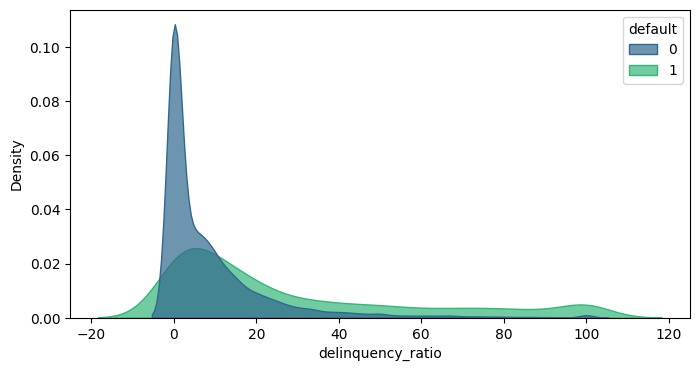

In [42]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1, x='delinquency_ratio', hue='default', fill=True, palette="viridis", common_norm = False, alpha=0.7)
plt.show()

#### Generate Avg DPD Per Delinquency

In [43]:
df_train_1['avg_dpd_per_delinquency'] = (
    (df_train_1['total_dpd'] / df_train_1['delinquent_months'])
    .round(1)
    .where(df_train_1['delinquent_months'] != 0, 0)
)

df_test['avg_dpd_per_delinquency'] = (
    (df_test['total_dpd'] / df_test['delinquent_months'])
    .round(1)
    .where(df_test['delinquent_months'] != 0, 0)
)

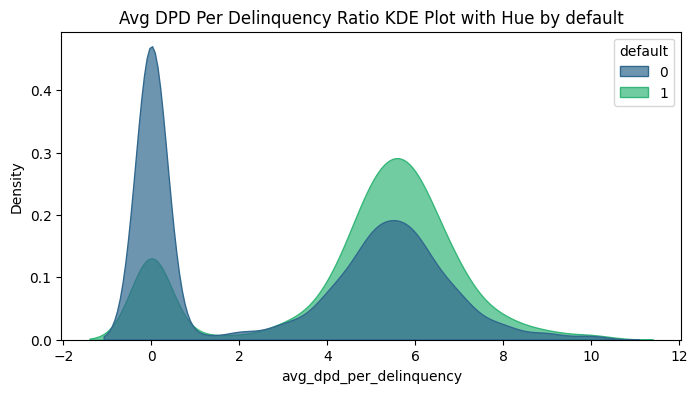

In [44]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1, x='avg_dpd_per_delinquency', hue="default", fill=True, common_norm=False, palette="viridis", alpha=0.7)
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.show()

#### Generate Credit Utilization Per LTI

In [45]:
df_train_1['credit_utilization_per_income'] = (
    (df_train_1['credit_utilization_ratio']/df_train_1['loan_to_income'])
    .round(1)
    .where(df_train_1['loan_to_income'] != 0, 0)
)


df_test['credit_utilization_per_income'] = (
    (df_test['credit_utilization_ratio']/df_test['loan_to_income'])
    .round(1)
    .where(df_test['loan_to_income'] != 0, 0)
)

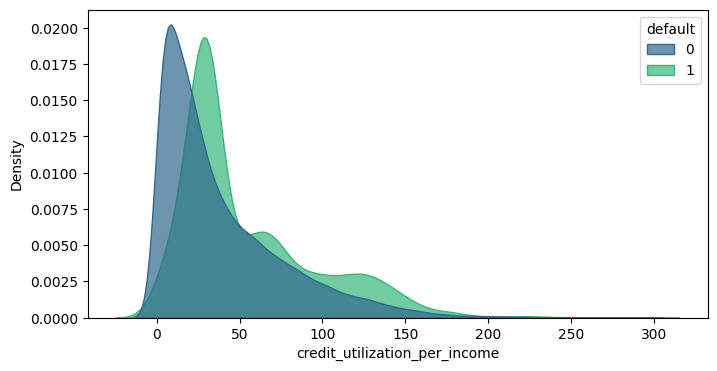

In [46]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1, x= 'credit_utilization_per_income', hue="default", fill=True, common_norm=False, palette="viridis", alpha=0.7)
plt.show()

### Remove columns that are just unique ids and don't have influence on target

In [47]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')

In [48]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

### Remove columns that business contact person asked us to remove

In [49]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

In [50]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

<Axes: >

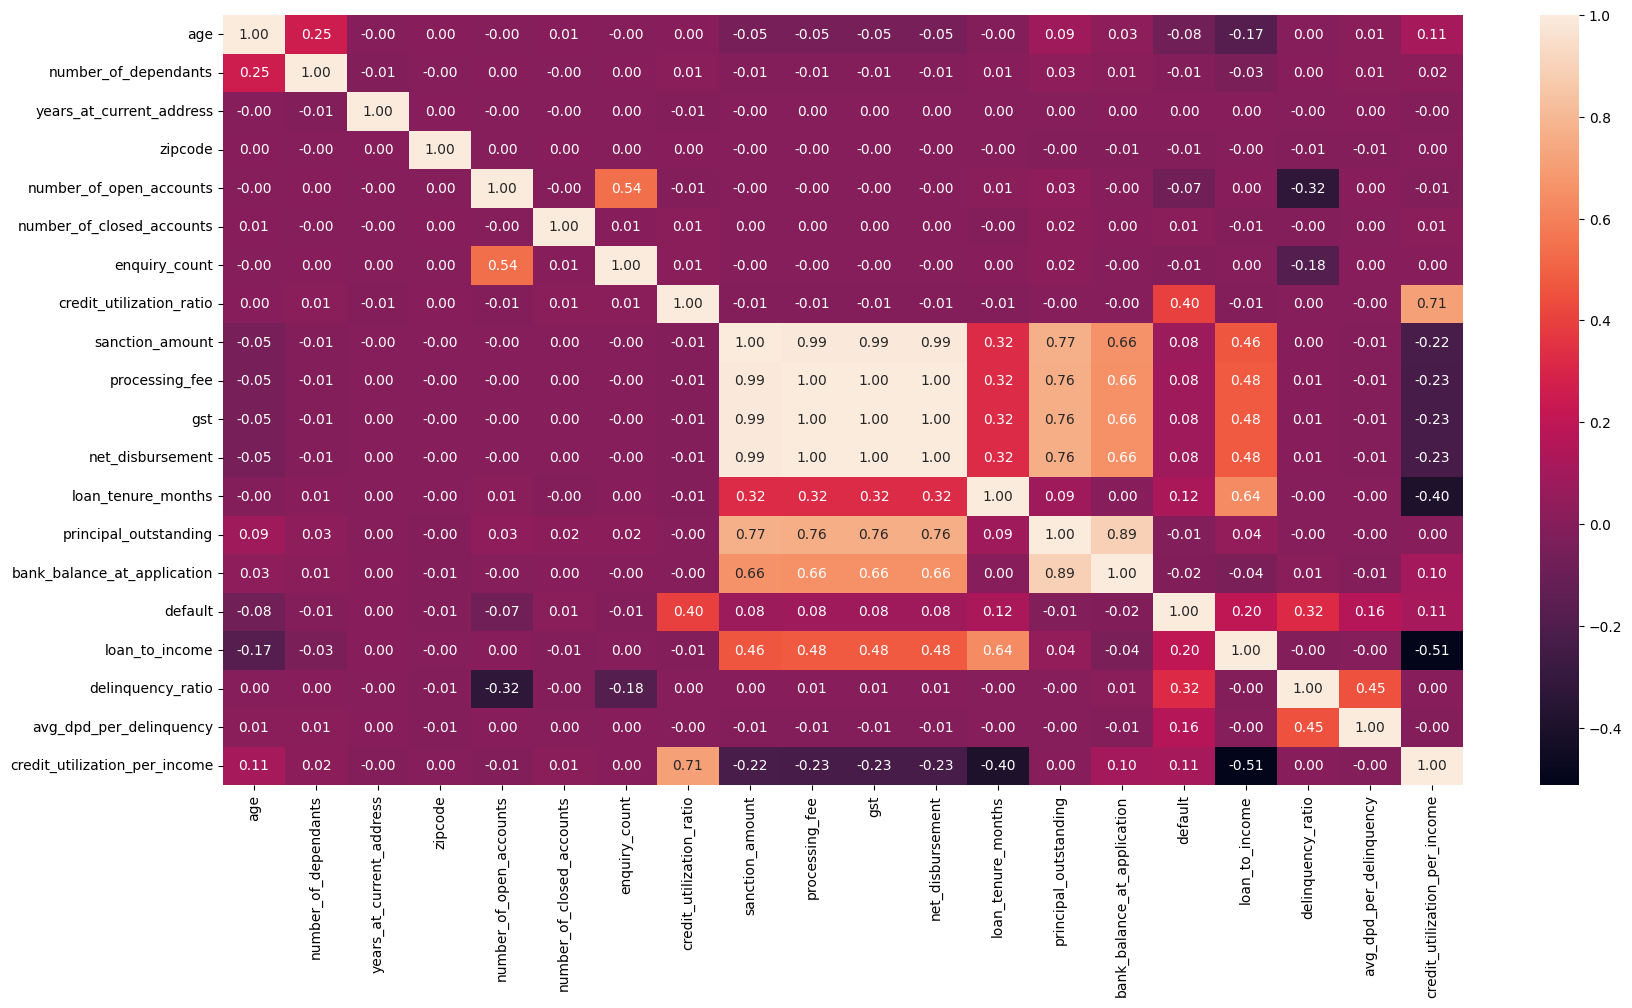

In [51]:
cm = df_train_3[df_train_3.select_dtypes(['int64', 'float64']).columns].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt=".2f")

In [52]:
cm['default'].sort_values(ascending=False)

default                          1.000000
credit_utilization_ratio         0.397551
delinquency_ratio                0.315214
loan_to_income                   0.200565
avg_dpd_per_delinquency          0.158217
loan_tenure_months               0.120362
credit_utilization_per_income    0.112898
processing_fee                   0.083214
gst                              0.083214
net_disbursement                 0.083214
sanction_amount                  0.076548
number_of_closed_accounts        0.009164
years_at_current_address         0.002964
enquiry_count                   -0.005898
number_of_dependants            -0.007260
zipcode                         -0.008155
principal_outstanding           -0.010851
bank_balance_at_application     -0.017927
number_of_open_accounts         -0.074184
age                             -0.075152
Name: default, dtype: float64

In [53]:
features_to_drop_cm = ['processing_fee', 'gst']
df_train_3.drop(columns=features_to_drop_cm, inplace=True)
df_test.drop(columns=features_to_drop_cm, inplace=True)

### VIF to measure multicolinearity

In [54]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.500925,0.50056,0.501077,0.438653,0.088840,0.082513,0.376631,0.261615,0.123550,0.294312,0.103299,0.328391,0.138187
std,0.189590,0.307182,0.297364,0.286491,0.373040,0.40701,0.253666,0.296902,0.120117,0.112480,0.234860,0.244461,0.133275,0.228030,0.172985,0.290663,0.132257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.000000,0.00000,0.375000,0.181818,0.020555,0.018963,0.188679,0.077988,0.034205,0.110070,0.000000,0.000000,0.040522
50%,0.403846,0.400000,0.500000,0.491525,0.666667,0.50000,0.500000,0.393939,0.049364,0.045516,0.339623,0.193870,0.082515,0.201405,0.037000,0.430000,0.094780
75%,0.538462,0.600000,0.766667,0.762712,1.000000,1.00000,0.625000,0.676768,0.098027,0.095555,0.547170,0.352418,0.155192,0.505855,0.129000,0.572500,0.199863
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Same transformation on test set

In [55]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.497293,0.500440,0.501470,0.436038,0.089218,0.082800,0.375092,0.264632,0.124944,0.293038,0.106074,0.333844,0.136872
std,0.188773,0.306871,0.298103,0.286179,0.372576,0.407226,0.253618,0.295418,0.120844,0.112877,0.233792,0.245290,0.134708,0.226176,0.173081,0.289680,0.130682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000019,-0.000126,0.000000,0.000163,0.000668,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.000000,0.000000,0.375000,0.181818,0.020958,0.019387,0.188679,0.079715,0.034167,0.112412,0.000000,0.000000,0.040522
50%,0.423077,0.400000,0.500000,0.510169,0.333333,0.500000,0.500000,0.393939,0.050189,0.046249,0.339623,0.198239,0.084024,0.201405,0.042000,0.440000,0.093407
75%,0.538462,0.600000,0.766667,0.762712,0.666667,1.000000,0.625000,0.676768,0.097422,0.094927,0.547170,0.356914,0.157792,0.498829,0.134000,0.580000,0.198832
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.981249,0.963717,1.000000,1.000000,0.939154,1.004684,1.000000,1.000000,0.961538


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [57]:
vif_df = calculate_vif(X_train[cols_to_scale])
vif_df

,Column,VIF
0,age,5.930004
1,number_of_dependants,2.731496
2,years_at_current_address,3.444771
3,zipcode,3.826306
4,number_of_open_accounts,4.388891
5,number_of_closed_accounts,2.393901
6,enquiry_count,6.442882
7,credit_utilization_ratio,10.441182
8,sanction_amount,101.155628
9,net_disbursement,102.193934


In [58]:
features_to_drop_vif = ['sanction_amount','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'net_disbursement', 'loan_tenure_months',
       'bank_balance_at_application', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')

In [59]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.612783
1,number_of_dependants,2.730362
2,years_at_current_address,3.441788
3,zipcode,3.820828
4,number_of_open_accounts,4.356495
5,number_of_closed_accounts,2.383943
6,enquiry_count,6.436379
7,credit_utilization_ratio,10.245914
8,net_disbursement,4.812317
9,loan_tenure_months,6.232135


In [60]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'net_disbursement',
       'loan_tenure_months', 'bank_balance_at_application',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'], dtype=object)

### Feature Selection: Categorical Features

In [61]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,credit_utilization_ratio,loan_purpose,loan_type,net_disbursement,loan_tenure_months,bank_balance_at_application,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
12746,0.788462,M,Married,Self-Employed,0.6,Owned,0.966667,Hyderabad,Telangana,0.661017,...,0.363636,Home,Secured,0.489626,0.415094,0.613386,0.414520,0.132,0.59,0.059753
32495,0.500000,F,Single,Salaried,0.0,Owned,0.866667,Mumbai,Maharashtra,0.491525,...,0.050505,Education,Secured,0.022884,0.830189,0.025205,0.306792,0.062,0.62,0.010646
43675,0.384615,M,Single,Salaried,0.0,Mortgage,0.833333,Chennai,Tamil Nadu,0.830508,...,0.000000,Home,Secured,0.235329,0.490566,0.174318,0.758782,0.222,0.56,0.000000
9040,0.461538,M,Married,Salaried,0.4,Mortgage,0.966667,Bangalore,Karnataka,0.762712,...,0.878788,Education,Secured,0.034315,0.641509,0.077523,0.194379,0.000,0.00,0.264423
13077,0.769231,M,Married,Self-Employed,0.8,Owned,0.933333,Pune,Maharashtra,0.510169,...,0.717172,Personal,Unsecured,0.017775,0.169811,0.072271,0.046838,0.000,0.00,0.487637


### Calculate WOE and IV

In [62]:
df_train_3.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [63]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.716891,0.076230
Education,5620,559,5061,0.173441,0.147702,0.160642,0.004135
Home,11304,1734,9570,0.538008,0.279294,0.655609,0.169616
Personal,13117,603,12514,0.187093,0.365212,-0.668874,0.119140


In [64]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            37488 non-null  float64
 1   gender                         37488 non-null  object 
 2   marital_status                 37488 non-null  object 
 3   employment_status              37488 non-null  object 
 4   number_of_dependants           37488 non-null  float64
 5   residence_type                 37488 non-null  object 
 6   years_at_current_address       37488 non-null  float64
 7   city                           37488 non-null  object 
 8   state                          37488 non-null  object 
 9   zipcode                        37488 non-null  float64
 10  number_of_open_accounts        37488 non-null  float64
 11  number_of_closed_accounts      37488 non-null  float64
 12  enquiry_count                  37488 non-null  

In [65]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = np.round(iv,2)

iv_df = pd.DataFrame({"columns":iv_values.keys(), "IV":iv_values.values()})
iv_df.sort_values(by="IV", ascending=False)

,columns,IV
13,credit_utilization_ratio,2.35
20,delinquency_ratio,0.72
19,loan_to_income,0.48
21,avg_dpd_per_delinquency,0.40
14,loan_purpose,0.37
5,residence_type,0.25
17,loan_tenure_months,0.22
22,credit_utilization_per_income,0.20
15,loan_type,0.16
16,net_disbursement,0.10


In [66]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_purpose',
 'loan_type',
 'net_disbursement',
 'loan_tenure_months',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency',
 'credit_utilization_per_income']

### Feature Encoding

In [67]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [68]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,number_of_open_accounts,credit_utilization_ratio,net_disbursement,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788462,1.000000,0.363636,0.489626,0.415094,0.414520,0.132,0.59,0.059753,True,False,False,True,False,False
32495,0.500000,0.666667,0.050505,0.022884,0.830189,0.306792,0.062,0.62,0.010646,True,False,True,False,False,False
43675,0.384615,0.000000,0.000000,0.235329,0.490566,0.758782,0.222,0.56,0.000000,False,False,False,True,False,False


In [69]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,number_of_open_accounts,credit_utilization_ratio,net_disbursement,loan_tenure_months,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346154,0.333333,0.989899,0.205892,0.754717,0.550351,0.0,0.0,0.127060,True,False,False,True,False,False
15514,0.480769,1.000000,0.323232,0.063459,0.226415,0.220141,0.0,0.0,0.088599,True,False,True,False,False,False
30367,0.230769,0.666667,0.828283,0.068400,0.547170,0.180328,0.0,0.0,0.263049,True,False,False,False,False,False


<h3 align="center" style="color:blue">Model Training</h3>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



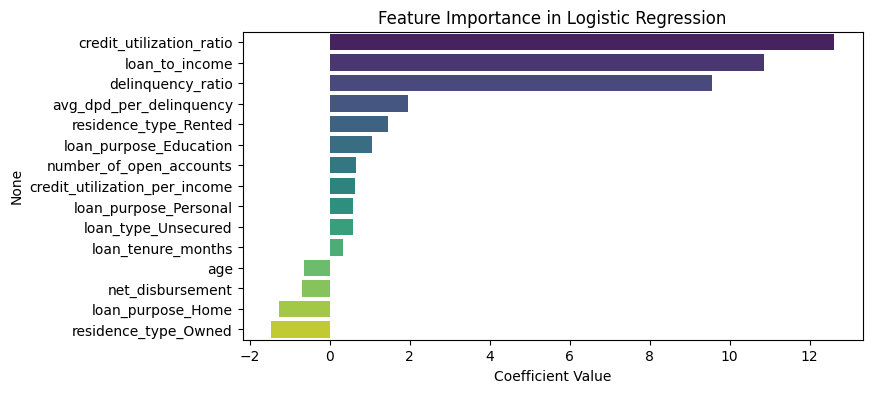

In [71]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=False)

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=coef_df['Coefficients'], y=coef_df.index, palette='viridis', hue=coef_df.index)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.72      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [73]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.81      0.75      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: Logistic Regression

#### RandomizedSearch CV for Attempt 1: XGBoost

In [74]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7912023274266877
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.84      0.81      1074

    accuracy                           0.97     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.97      0.97     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [75]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [76]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [77]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [78]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34219
1    34219
Name: count, dtype: int64

In [79]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [80]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [81]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-06-22 22:34:43,748] A new study created in memory with name: no-name-767edd3f-5760-400d-9c7b-e0d9780f9394
/opt/homebrew/Cellar/jupyterlab/4.4.3_2/libexec/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/Cellar/jupyterlab/4.4.3_2/libexec/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/Cellar/jupyterlab/4.4.3_2/libexec/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/homebrew/Cellar/jupyterlab/4.4.3_2/libexec/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/

In [82]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9466651459529709
  Params: 
    C: 2484.289579050809
    solver: newton-cg
    tol: 1.5651194403466311e-06
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [83]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-06-22 22:34:49,871] A new study created in memory with name: no-name-dbd63171-d67d-4e3e-88b9-333418eb1227
[I 2025-06-22 22:34:50,155] Trial 0 finished with value: 0.9692932554860261 and parameters: {'lambda': 0.06521482206389158, 'alpha': 0.2643007470768793, 'subsample': 0.7681614794558093, 'colsample_bytree': 0.9325138824107243, 'max_depth': 10, 'eta': 0.22257598057136838, 'gamma': 5.635709864128411, 'scale_pos_weight': 6.143545828739199, 'min_child_weight': 4, 'max_delta_step': 8}. Best is trial 0 with value: 0.9692932554860261.
[I 2025-06-22 22:34:50,350] Trial 1 finished with value: 0.9237742908090617 and parameters: {'lambda': 2.3338851906126794, 'alpha': 3.5568105663782474, 'subsample': 0.6668655868703025, 'colsample_bytree': 0.7301513269074265, 'max_depth': 3, 'eta': 0.10490934933658543, 'gamma': 4.780685338149868, 'scale_pos_weight': 9.92201762325522, 'min_child_weight': 1, 'max_delta_step': 7}. Best is trial 0 with value: 0.9692932554860261.
[I 2025-06-22 22:34:50,580]

In [84]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9767899639900558
  Params: 
    lambda: 2.7710506941943907
    alpha: 0.0031759256365110366
    subsample: 0.9300168029717749
    colsample_bytree: 0.9638747963016812
    max_depth: 9
    eta: 0.21406018026557824
    gamma: 0.5024193627756904
    scale_pos_weight: 2.1347991169673803
    min_child_weight: 1
    max_delta_step: 9
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.70      0.87      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.84      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



## Model Evaluation : ROC/AUC

In [85]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [86]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05]),
 array([0.        , 0.0009311 , 0.16573557, 0.16573557, 0.18063315]),
 array([       inf, 1.        , 0.9995634 , 0.99956262, 0.99944377]))

In [87]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9837997140924636)

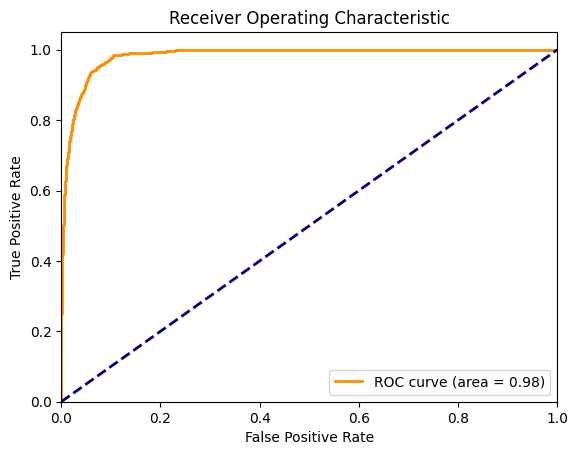

In [88]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [89]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.474565
15514,0,0.000008
30367,0,0.004832


In [90]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.474565,8
15514,0,0.000008,2
30367,0,0.004832,6


In [91]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count    1250.000000
mean        0.478682
std         0.185229
min         0.200143
25%         0.315922
50%         0.456398
75%         0.635178
max         0.820198
Name: Default Probability, dtype: float64

In [92]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),
}))
df_decile.reset_index(inplace=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,3.615304e-10,3.357637e-07,0.0,1250.0
1,1,3.363954e-07,2.992251e-06,0.0,1250.0
2,2,2.993624e-06,1.700288e-05,0.0,1249.0
3,3,1.702248e-05,9.786766e-05,0.0,1250.0
4,4,9.794428e-05,5.442240e-04,0.0,1250.0
5,5,5.475638e-04,3.315585e-03,0.0,1249.0
6,6,3.317634e-03,2.567143e-02,2.0,1248.0
7,7,2.571013e-02,1.999255e-01,11.0,1238.0
8,8,2.001426e-01,8.201976e-01,164.0,1086.0
9,9,8.204871e-01,1.000000e+00,897.0,353.0


In [93]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,3.615304e-10,3.357637e-07,0.0,1250.0,0.000000,100.000000
1,1,3.363954e-07,2.992251e-06,0.0,1250.0,0.000000,100.000000
2,2,2.993624e-06,1.700288e-05,0.0,1249.0,0.000000,100.000000
3,3,1.702248e-05,9.786766e-05,0.0,1250.0,0.000000,100.000000
4,4,9.794428e-05,5.442240e-04,0.0,1250.0,0.000000,100.000000
5,5,5.475638e-04,3.315585e-03,0.0,1249.0,0.000000,100.000000
6,6,3.317634e-03,2.567143e-02,2.0,1248.0,0.160000,99.840000
7,7,2.571013e-02,1.999255e-01,11.0,1238.0,0.880705,99.119295
8,8,2.001426e-01,8.201976e-01,164.0,1086.0,13.120000,86.880000
9,9,8.204871e-01,1.000000e+00,897.0,353.0,71.760000,28.240000


In [94]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,8.204871e-01,1.000000e+00,897.0,353.0,71.760000,28.240000
1,8,2.001426e-01,8.201976e-01,164.0,1086.0,13.120000,86.880000
2,7,2.571013e-02,1.999255e-01,11.0,1238.0,0.880705,99.119295
3,6,3.317634e-03,2.567143e-02,2.0,1248.0,0.160000,99.840000
4,5,5.475638e-04,3.315585e-03,0.0,1249.0,0.000000,100.000000
5,4,9.794428e-05,5.442240e-04,0.0,1250.0,0.000000,100.000000
6,3,1.702248e-05,9.786766e-05,0.0,1250.0,0.000000,100.000000
7,2,2.993624e-06,1.700288e-05,0.0,1249.0,0.000000,100.000000
8,1,3.363954e-07,2.992251e-06,0.0,1250.0,0.000000,100.000000
9,0,3.615304e-10,3.357637e-07,0.0,1250.0,0.000000,100.000000


In [95]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,8.204871e-01,1.000000e+00,897.0,353.0,71.760000,28.240000,897.0,353.0
1,8,2.001426e-01,8.201976e-01,164.0,1086.0,13.120000,86.880000,1061.0,1439.0
2,7,2.571013e-02,1.999255e-01,11.0,1238.0,0.880705,99.119295,1072.0,2677.0
3,6,3.317634e-03,2.567143e-02,2.0,1248.0,0.160000,99.840000,1074.0,3925.0
4,5,5.475638e-04,3.315585e-03,0.0,1249.0,0.000000,100.000000,1074.0,5174.0
5,4,9.794428e-05,5.442240e-04,0.0,1250.0,0.000000,100.000000,1074.0,6424.0
6,3,1.702248e-05,9.786766e-05,0.0,1250.0,0.000000,100.000000,1074.0,7674.0
7,2,2.993624e-06,1.700288e-05,0.0,1249.0,0.000000,100.000000,1074.0,8923.0
8,1,3.363954e-07,2.992251e-06,0.0,1250.0,0.000000,100.000000,1074.0,10173.0
9,0,3.615304e-10,3.357637e-07,0.0,1250.0,0.000000,100.000000,1074.0,11423.0


In [96]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,8.204871e-01,1.000000e+00,897.0,353.0,71.760000,28.240000,897.0,353.0,83.519553,3.090257
1,8,2.001426e-01,8.201976e-01,164.0,1086.0,13.120000,86.880000,1061.0,1439.0,98.789572,12.597391
2,7,2.571013e-02,1.999255e-01,11.0,1238.0,0.880705,99.119295,1072.0,2677.0,99.813780,23.435175
3,6,3.317634e-03,2.567143e-02,2.0,1248.0,0.160000,99.840000,1074.0,3925.0,100.000000,34.360501
4,5,5.475638e-04,3.315585e-03,0.0,1249.0,0.000000,100.000000,1074.0,5174.0,100.000000,45.294581
5,4,9.794428e-05,5.442240e-04,0.0,1250.0,0.000000,100.000000,1074.0,6424.0,100.000000,56.237416
6,3,1.702248e-05,9.786766e-05,0.0,1250.0,0.000000,100.000000,1074.0,7674.0,100.000000,67.180250
7,2,2.993624e-06,1.700288e-05,0.0,1249.0,0.000000,100.000000,1074.0,8923.0,100.000000,78.114331
8,1,3.363954e-07,2.992251e-06,0.0,1250.0,0.000000,100.000000,1074.0,10173.0,100.000000,89.057165
9,0,3.615304e-10,3.357637e-07,0.0,1250.0,0.000000,100.000000,1074.0,11423.0,100.000000,100.000000


In [97]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,8.204871e-01,1.000000e+00,897.0,353.0,71.760000,28.240000,897.0,353.0,83.519553,3.090257,80.429297
1,8,2.001426e-01,8.201976e-01,164.0,1086.0,13.120000,86.880000,1061.0,1439.0,98.789572,12.597391,86.192180
2,7,2.571013e-02,1.999255e-01,11.0,1238.0,0.880705,99.119295,1072.0,2677.0,99.813780,23.435175,76.378606
3,6,3.317634e-03,2.567143e-02,2.0,1248.0,0.160000,99.840000,1074.0,3925.0,100.000000,34.360501,65.639499
4,5,5.475638e-04,3.315585e-03,0.0,1249.0,0.000000,100.000000,1074.0,5174.0,100.000000,45.294581,54.705419
5,4,9.794428e-05,5.442240e-04,0.0,1250.0,0.000000,100.000000,1074.0,6424.0,100.000000,56.237416,43.762584
6,3,1.702248e-05,9.786766e-05,0.0,1250.0,0.000000,100.000000,1074.0,7674.0,100.000000,67.180250,32.819750
7,2,2.993624e-06,1.700288e-05,0.0,1249.0,0.000000,100.000000,1074.0,8923.0,100.000000,78.114331,21.885669
8,1,3.363954e-07,2.992251e-06,0.0,1250.0,0.000000,100.000000,1074.0,10173.0,100.000000,89.057165,10.942835
9,0,3.615304e-10,3.357637e-07,0.0,1250.0,0.000000,100.000000,1074.0,11423.0,100.000000,100.000000,0.000000


In [98]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9837997140924636
Gini Coefficient: 0.9675994281849272


#### Finalize The Model and Visualize Feature Importance

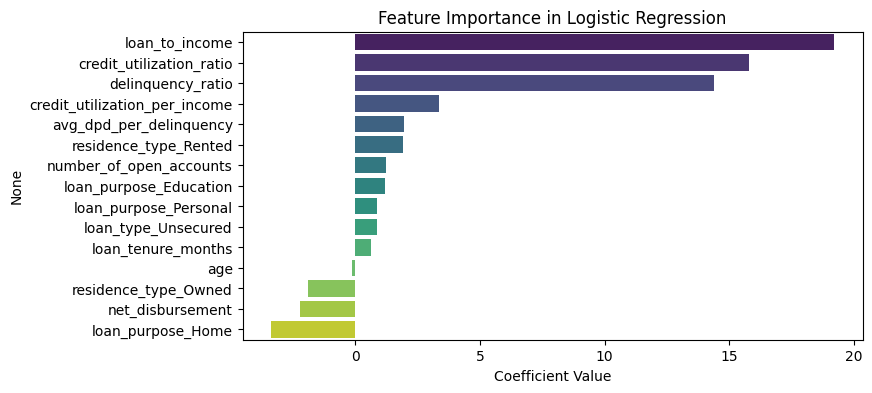

In [99]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=False)

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=coef_df['Coefficients'], y=coef_df.index, hue=coef_df.index, palette='viridis')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [100]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

### Exercise

### Exercise Attempt 1 - Bayesian Search with logistic regression

In [101]:
from bayes_opt import BayesianOptimization

In [102]:
# Define the function to optimize
def optimize_log_reg(C, max_iter):
    model = LogisticRegression(C=C, max_iter=int(max_iter), solver='liblinear')
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='roc_auc')
    # We want to maximize the AUC-ROC score
    return scores.mean()

In [103]:
# Define the parameter space
param_bounds = {
    'C': (0.001, 10.0),
    'max_iter': (50, 500)
}

In [104]:
# Initialize the Bayesian optimizer
optimizer = BayesianOptimization(
    f=optimize_log_reg,
    pbounds=param_bounds,
    random_state=42
)

In [105]:
# Perform the optimization
optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
| 2         | 0.9828202 | 3.7460266 | 477.82143 |
| 3         | 0.9828499 | 7.3202074 | 319.39631 |
| 4         | 0.9826542 | 1.5610303 | 120.19753 |
| 5         | 0.9820596 | 0.5817780 | 439.77926 |
| 6         | 0.9828493 | 6.0115490 | 368.63266 |
| 7         | 0.9804683 | 0.2068243 | 486.45943 |
| 8         | 0.9828552 | 8.3245939 | 145.55259 |
| 9         | 0.9827012 | 1.8190678 | 132.53202 |
| 10        | 0.9827949 | 3.0431181 | 286.14039 |
| 11        | 0.9828299 | 4.3200182 | 181.05311 |
| 12        | 0.9828526 | 7.8519744 | 118.46654 |
| 13        | 0.9828600 | 9.9913716 | 144.91808 |
| 14        | 0.9828480 | 6.5510892 | 471.05374 |
| 15        | 0.9828556 | 8.5260978 | 108.95095 |
| 16        | 0.9828529 | 7.8468630 | 309.52352 |
| 17        | 0.9807237 | 0.2328530 | 314.44667 |
| 18        | 0.9828059 | 3.3164625 | 112.80538 |
| 19        | 0.9828596 | 9.9768452 | 326.09727 |


In [106]:
# Extract the best parameters
best_params = optimizer.max['params']
best_params['max_iter'] = int(best_params['max_iter'])

In [107]:
# Train the final model with the best parameters
final_model = LogisticRegression(**best_params, solver='liblinear')
final_model.fit(X_train_encoded, y_train)

LogisticRegression(C=np.float64(9.991371625088883), max_iter=144,
                   solver='liblinear')

In [108]:
# Evaluate the final model on the test set
y_pred = final_model.predict(X_test_encoded)
y_prob = final_model.predict_proba(X_test_encoded)[:, 1]

In [109]:
# Print the classification report and AUC-ROC score
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.84      0.74      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [110]:
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

AUC-ROC Score: 0.8623523043368186


### Exercise Attempt 2 - XGBoost with grid search

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

In [113]:
# Extract the best parameters
best_params = grid_search.best_params_
best_params

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# Train the final model with the best parameters
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test_encoded)
y_prob = best_xgb_model.predict_proba(X_test_encoded)[:, 1]

In [ ]:
# Evaluate the final model
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

In [523]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.85      0.76      0.80      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.87      0.89     12497
weighted avg       0.97      0.97      0.97     12497

